,Dataset,Model,Type,Score
0,건포도,Logistic,Default,0.8608
1,건포도,KNN,Default,0.8620
2,건포도,Decision Tree,Default,0.8222
3,건포도,Random Forest,Default,0.8725
4,건포도,Logistic,Optimized,0.8542
5,건포도,KNN,Optimized,0.8516
6,건포도,Decision Tree,Optimized,0.8562
7,건포도,Random Forest,Optimized,0.8836
8,유방암,Logistic,Default,0.9572
9,유방암,KNN,Default,0.8783


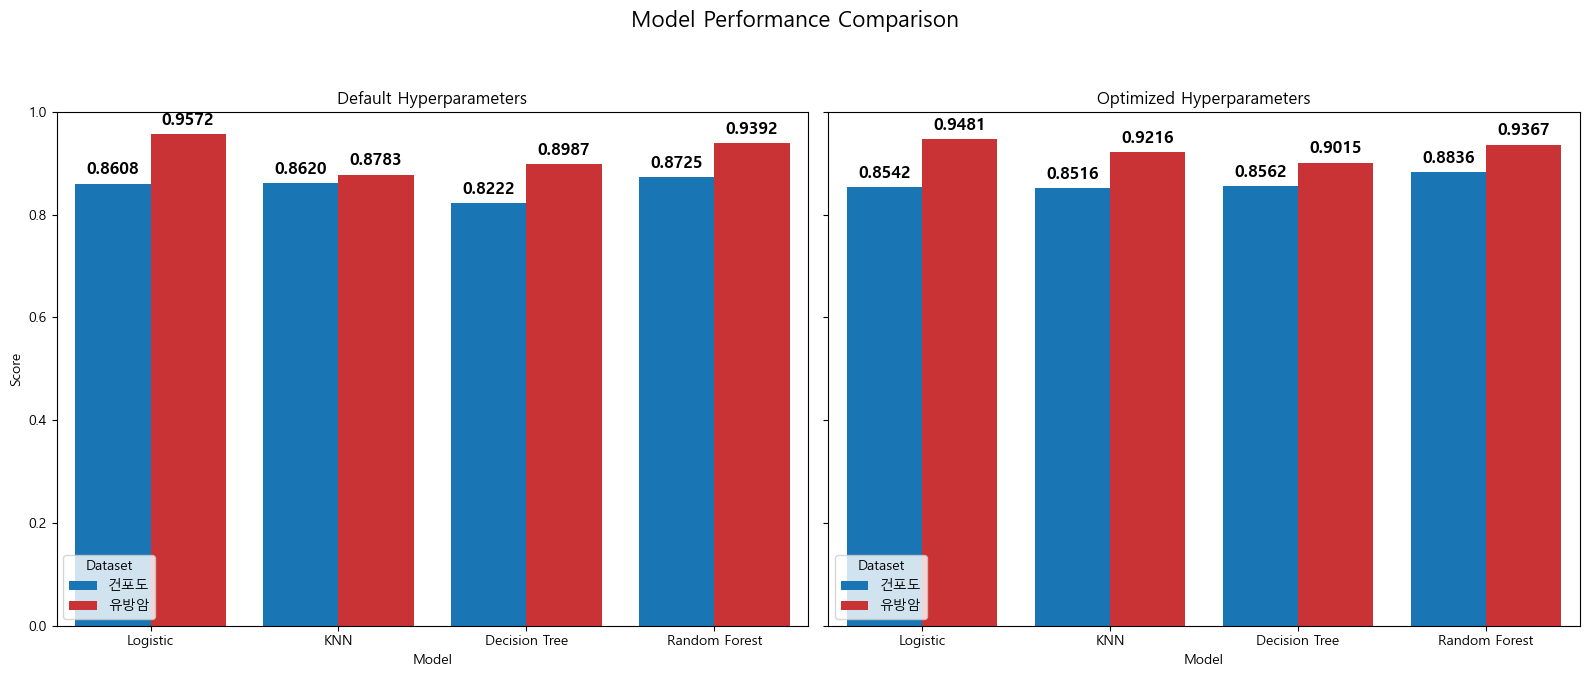

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
# 데이터 준비
data = {
    'Dataset': ['건포도'] * 8 + ['유방암'] * 8,
    'Model': ['Logistic', 'KNN', 'Decision Tree', 'Random Forest'] * 4,
    'Type': ['Default'] * 4 + ['Optimized'] * 4 + ['Default'] * 4 + ['Optimized'] * 4,
    'Score': [
        0.8608, 0.8620, 0.8222, 0.8725,   # 건포도 - default
        0.8542, 0.8516, 0.8562, 0.8836,   # 건포도 - optimized
        0.9572, 0.8783, 0.8987, 0.9392,   # 유방암 - default
        0.9481, 0.9216, 0.9015, 0.9367    # 유방암 - optimized
    ]
}
df = pd.DataFrame(data)
display(df)
def display_score_comparison(data) :
	df = pd.DataFrame(data)
	model_order = ['Logistic', 'KNN', 'Decision Tree', 'Random Forest']

	# 플롯 생성
	fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

	# 색상 지정
	palette = ['#007acc', '#e31a1c']

	# 좌측: Default
	sns.barplot(
		data=df[df['Type'] == 'Default'],
		x='Model', y='Score', hue='Dataset',
		order=model_order, ax=axes[0], palette=palette
	)
	axes[0].set_title('Default Hyperparameters')
	axes[0].set_xlabel('Model')
	axes[0].set_ylabel('Score')
	axes[0].set_ylim(0, 1)

	# 막대 위에 숫자 표시
	for p in axes[0].patches:
		height = p.get_height()
		if height > 0:
			axes[0].text(
				p.get_x() + p.get_width() / 2,
				height + 0.01,
				f'{height:.4f}',
				ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
			)
	axes[0].legend(title="Dataset", loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=10)
	
	# 우측: Optimized
	sns.barplot(
		data=df[df['Type'] == 'Optimized'],
		x='Model', y='Score', hue='Dataset',
		order=model_order, ax=axes[1], palette=palette
	)
	axes[1].set_title('Optimized Hyperparameters')
	axes[1].set_xlabel('Model')
	axes[1].set_ylabel('')
	axes[1].set_ylim(0, 1)
	axes[1].legend(title="Dataset", loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=10)
	# 막대 위에 숫자 표시
	for p in axes[1].patches:
		height = p.get_height()
		if height > 0:
			axes[1].text(
				p.get_x() + p.get_width() / 2,
				height + 0.01,
				f'{height:.4f}',
				ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
			)

	# 전체 제목
	fig.suptitle('Model Performance Comparison', fontsize=16, y=1.12)
	plt.tight_layout()
	plt.subplots_adjust(top=0.95)  # 제목 공간 확보

	plt.show()
display_score_comparison(data)

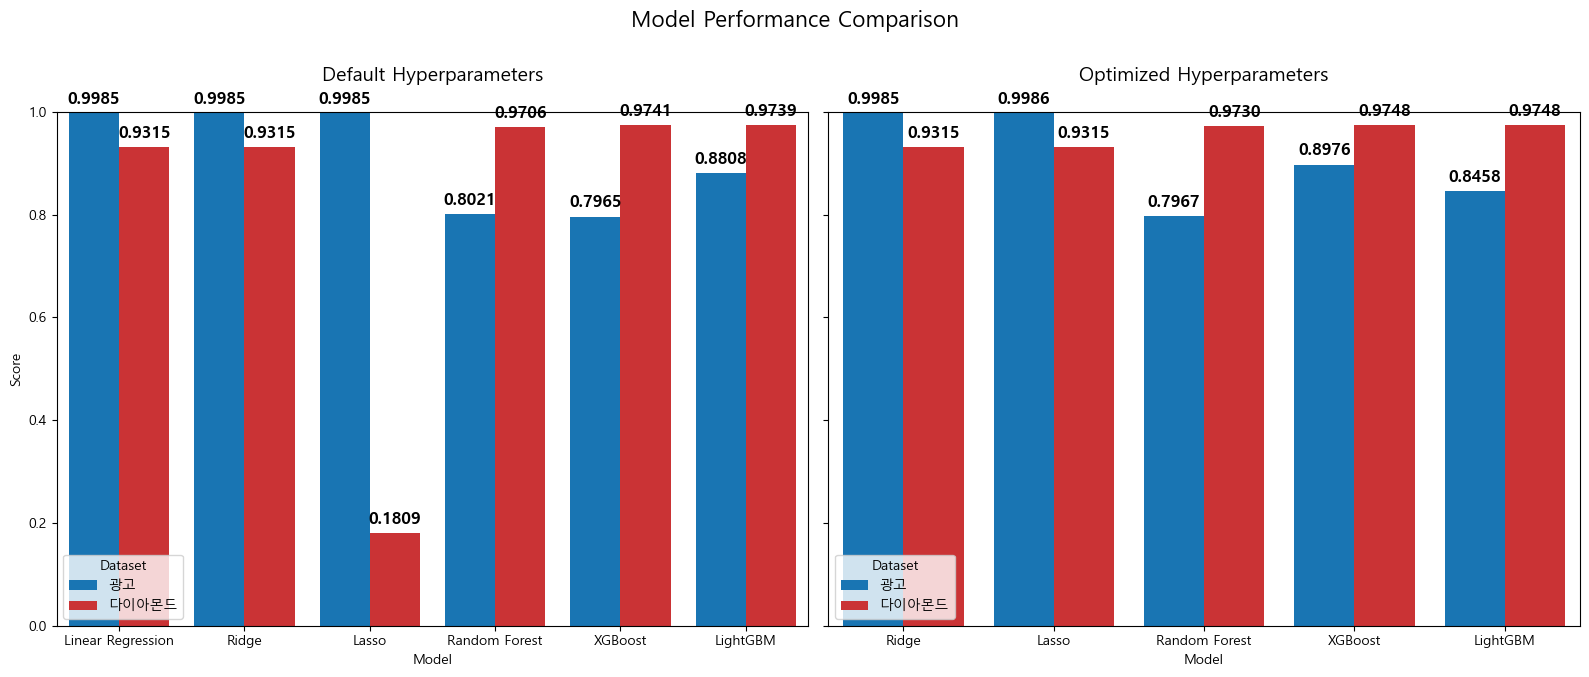

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def display_score_comparison(data):
    df = pd.DataFrame(data)
    
    # 모델 순서 변경
    model_order = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost', 'LightGBM']
    
    # 플롯 생성
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # 색상 지정
    palette = ['#007acc', '#e31a1c']

    # 좌측: Default
    sns.barplot(
        data=df[df['Type'] == 'Default'],
        x='Model', y='Score', hue='Dataset',
        order=model_order, ax=axes[0], palette=palette
    )
    axes[0].set_title('Default Hyperparameters', fontsize=14, pad=22)
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('Score')
    axes[0].set_ylim(0, 1)
    axes[0].legend(title="Dataset", loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=10)
    # 막대 위에 숫자 표시
    for p in axes[0].patches:
        height = p.get_height()
        if height > 0:
            axes[0].text(
                p.get_x() + p.get_width() / 2,
                height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
            )

    # 우측: Optimized (Linear Regression 제외)
    optimized_data = df[df['Type'] == 'Optimized']
    optimized_data = optimized_data[optimized_data['Model'] != 'Linear Regression']  # Linear Regression 제외
    
    sns.barplot(
        data=optimized_data,
        x='Model', y='Score', hue='Dataset',
        order=model_order[1:], ax=axes[1], palette=palette  # 'Linear Regression'을 제외한 모델 순서
    )
    axes[1].set_title('Optimized Hyperparameters', fontsize=14, pad=22)
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('')
    axes[1].set_ylim(0, 1)
    axes[1].legend(title="Dataset", loc='lower left', bbox_to_anchor=(0.0, 0.0), fontsize=10)
    # 막대 위에 숫자 표시
    for p in axes[1].patches:
        height = p.get_height()
        if height > 0:
            axes[1].text(
                p.get_x() + p.get_width() / 2,
                height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
            )

    # 전체 제목
    fig.suptitle('Model Performance Comparison', fontsize=16, y=1.12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # 제목/범례 공간 확보

    plt.show()

# 예시 데이터: 각 모델에 대해 '광고'와 '다이아몬드' 데이터셋에서 Default와 Optimized의 Score
data = {
    'Dataset': ['광고'] * 12 + ['다이아몬드'] * 12,
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'XGBoost', 'LightGBM'] * 4,
    'Type': ['Default'] * 6 + ['Optimized'] * 6 + ['Default'] * 6 + ['Optimized'] * 6,
    'Score': [
        # 광고 - default
        0.9985, 0.9985, 0.9985, 0.8021, 0.7965, 0.8808,
        # 광고 - optimized
        0.9985, 0.9985, 0.9986, 0.7967, 0.8976, 0.8458,
        # 다이아몬드 - default
        0.9315, 0.9315, 0.1809, 0.9706, 0.9741, 0.9739,
        # 다이아몬드 - optimized
        0.9315, 0.9315, 0.9315, 0.9730, 0.9748, 0.9748
    ]
}

# 함수 호출
display_score_comparison(data)